In [1]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth

from sklearn.metrics import confusion_matrix

# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

import functions

pd.set_option('display.max_columns', None)

In [2]:
#path = '/Users/antoniooliveira/Downloads/NTT project/Clustering'
path = "C:/Users/aprataso/Downloads/final_data/Clustering"

customer_info = pd.read_csv(f'{path}/customer_info_treated.csv')
customer_info.set_index('household_key')
customer_info.head(2)

,household_key,retail_disc,coupon_disc,coupon_match_disc,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,Photo/Video_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count
0,1,-0.403613,-0.046647,-0.015142,2021-02-20,0,Homeowner,married,senior,2.0,0.0,65.0,42000.0,0.0,2.0,3285.02,226.99,373.56,102.01,568.23,44.09,21.40,4.47,8.55,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1997,4634.32,10
1,2,-0.469174,-0.012605,0.000000,2021-04-13,1,Probable Owner,single,young adult,1.0,0.0,21.5,25000.0,0.0,1.0,1361.50,50.01,238.86,26.55,353.11,0.00,4.56,0.00,23.53,9.62,23.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,834,2091.36,9


In [5]:
pd.set_option('display.float_format', '{:.3f}'.format)
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,2500.000,1250.500,721.832,1.000,625.750,1250.500,1875.250,2500.000
retail_disc,2500.000,-0.560,0.278,-4.752,-0.637,-0.504,-0.413,-0.036
coupon_disc,2500.000,-0.014,0.027,-0.421,-0.015,-0.005,0.000,0.000
coupon_match_disc,2500.000,-0.002,0.006,-0.101,-0.002,-0.000,0.000,0.000
marital_status_code,2500.000,0.989,0.852,0.000,0.000,1.000,2.000,2.000
adult_category_size,2500.000,1.447,0.497,1.000,1.000,1.000,2.000,2.000
has_kids,2500.000,0.338,0.473,0.000,0.000,0.000,1.000,1.000
avg_age,2500.000,39.913,14.452,21.500,29.500,39.500,49.500,65.000
avg_income,2500.000,78072.000,66852.827,15000.000,29500.000,62000.000,112000.000,250000.000
n_kids,2500.000,0.443,0.706,0.000,0.000,0.000,1.000,3.000


In [37]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date'])]

In [6]:
no_quantity = customer_info.loc[:, ~customer_info.columns.str.contains('_spend')]
no_quantity

,household_key,retail_disc,coupon_disc,coupon_match_disc,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count
0,1,-0.404,-0.047,-0.015,2021-02-20,0,Homeowner,married,senior,2.000,0.000,65.000,42000.000,0.000,2.000,2.000,0,1997,4634.320,10
1,2,-0.469,-0.013,0.000,2021-04-13,1,Probable Owner,single,young adult,1.000,0.000,21.500,25000.000,0.000,1.000,0.000,1,834,2091.360,9
2,3,-0.732,-0.066,-0.021,2021-04-23,0,Homeowner,married,middle-aged,2.000,1.000,49.500,137000.000,2.000,4.000,2.000,0,8540,2839.080,10
3,4,-0.384,-0.008,0.000,2021-04-14,1,Renter,single,senior,1.000,0.000,65.000,19500.000,0.000,1.000,1.000,2,382,1284.170,6
4,5,-0.533,0.000,0.000,2021-03-26,0,Homeowner,married,senior,1.000,0.000,65.000,162000.000,0.000,1.000,1.000,0,245,833.700,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,-0.749,-0.035,-0.008,2021-04-27,0,Homeowner,married,middle-aged,2.000,0.000,49.500,87000.000,0.000,3.000,2.000,0,130304,4644.320,11
2496,2497,-0.684,-0.009,-0.000,2021-03-19,2,Unknown,single,middle-aged,1.000,0.000,49.500,42000.000,0.000,1.000,0.000,4,61236,7610.700,13
2497,2498,-0.325,0.000,0.000,2021-04-15,2,Homeowner,unknown,adult,2.000,0.000,29.500,62000.000,0.000,2.000,2.000,0,31339,2784.030,11
2498,2499,-0.427,-0.003,-0.000,2021-03-11,2,Unknown,unknown,adult,2.000,1.000,29.500,15000.000,1.000,3.000,2.000,4,143449,3632.280,11


In [7]:
no_quantity_num = no_quantity.loc[:, ~no_quantity.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date'])]

no_quantity_num

,household_key,retail_disc,coupon_disc,coupon_match_disc,marital_status_code,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count
0,1,-0.404,-0.047,-0.015,0,2.000,0.000,65.000,42000.000,0.000,2.000,2.000,0,1997,4634.320,10
1,2,-0.469,-0.013,0.000,1,1.000,0.000,21.500,25000.000,0.000,1.000,0.000,1,834,2091.360,9
2,3,-0.732,-0.066,-0.021,0,2.000,1.000,49.500,137000.000,2.000,4.000,2.000,0,8540,2839.080,10
3,4,-0.384,-0.008,0.000,1,1.000,0.000,65.000,19500.000,0.000,1.000,1.000,2,382,1284.170,6
4,5,-0.533,0.000,0.000,0,1.000,0.000,65.000,162000.000,0.000,1.000,1.000,0,245,833.700,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,-0.749,-0.035,-0.008,0,2.000,0.000,49.500,87000.000,0.000,3.000,2.000,0,130304,4644.320,11
2496,2497,-0.684,-0.009,-0.000,2,1.000,0.000,49.500,42000.000,0.000,1.000,0.000,4,61236,7610.700,13
2497,2498,-0.325,0.000,0.000,2,2.000,0.000,29.500,62000.000,0.000,2.000,2.000,0,31339,2784.030,11
2498,2499,-0.427,-0.003,-0.000,2,2.000,1.000,29.500,15000.000,1.000,3.000,2.000,4,143449,3632.280,11


SCALE

In [8]:
scaled_info = StandardScaler().fit_transform(no_quantity_num)

In [9]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


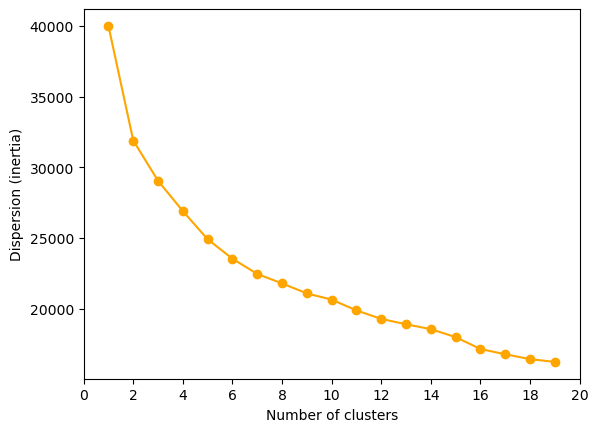

In [10]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


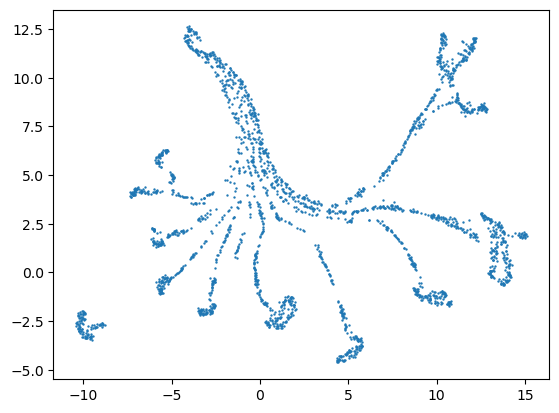

In [31]:
umap_object = umap.UMAP(n_neighbors=200, min_dist=0.4, n_components=2, random_state=42)

# n_neighbours - neighbours to consider; lower values --> more local structure
# min_dist - min_dist between neighbours; low values --> tighter groups
# n_components - dimensions of the output
X_sample = no_quantity_num.sort_index()
umap_embedding = umap_object.fit_transform(X_sample)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1],s=0.5)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users

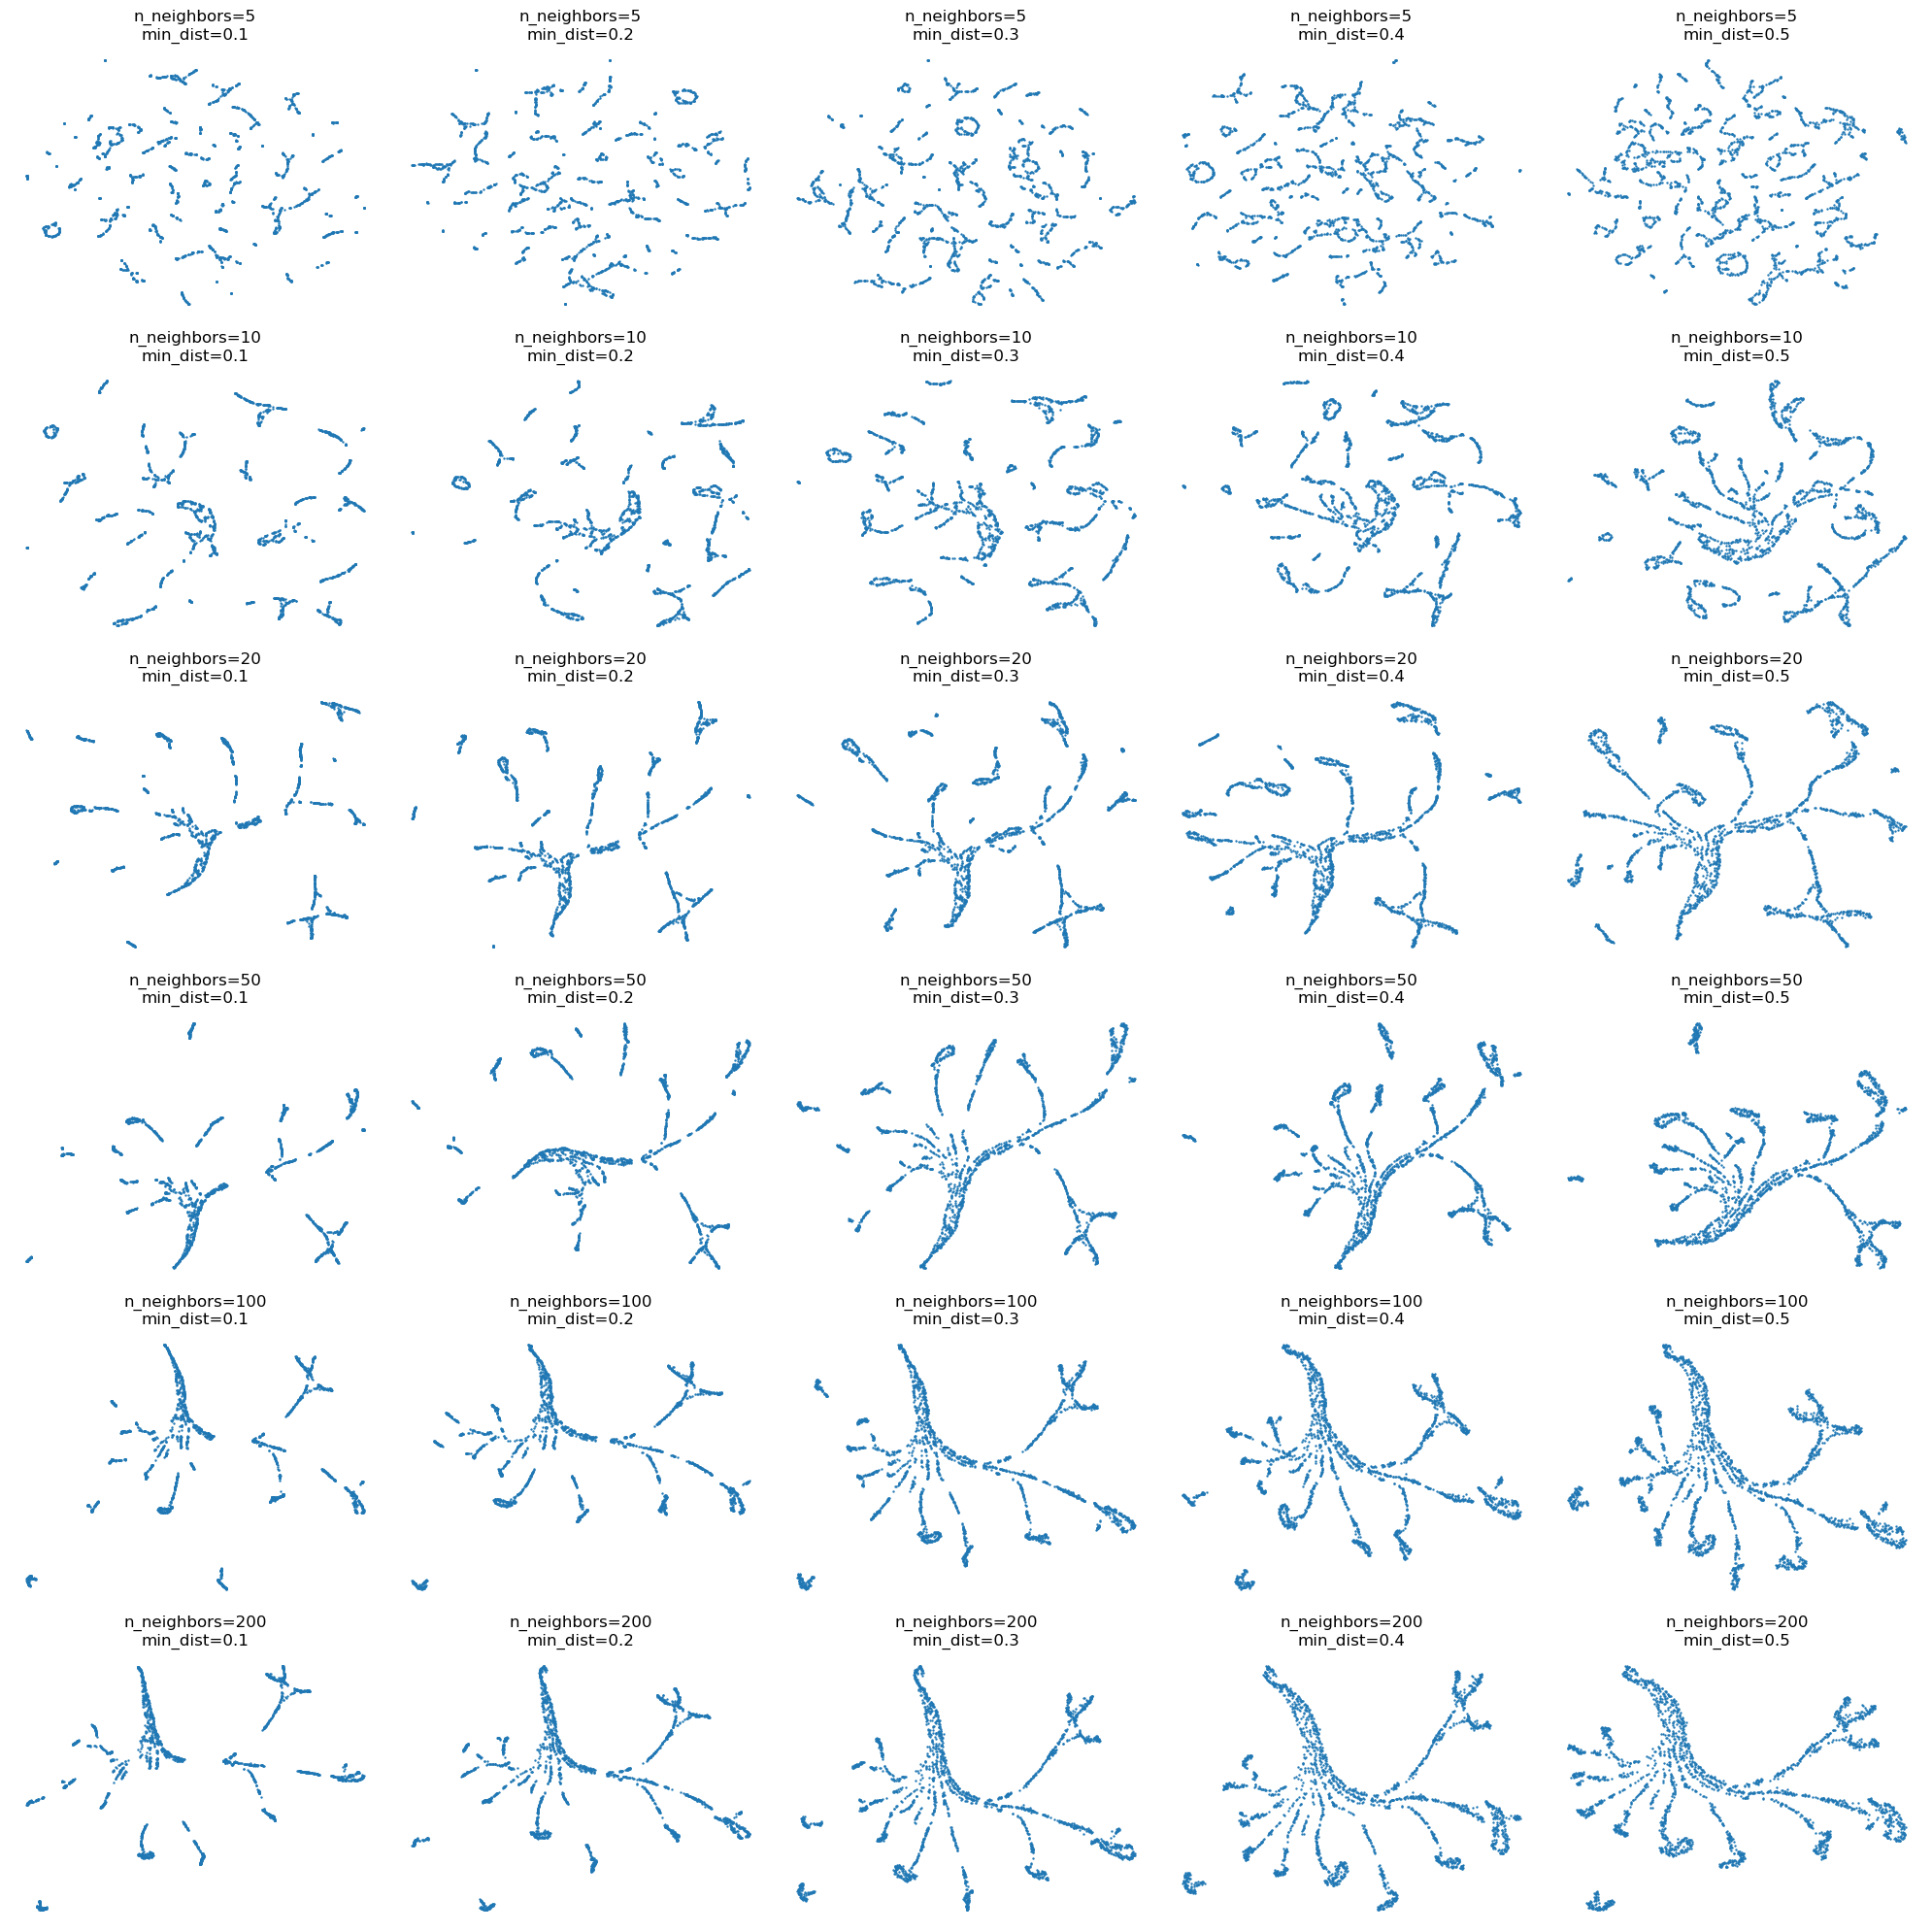

In [33]:
#SEM SPENDS

neighbor_ranges = [5, 10, 20, 50, 100, 200]
min_dist_ranges = [0.1, 0.2, 0.3, 0.4, 0.5]

# Calculate the number of plots
n_neighbors_len = len(neighbor_ranges)
min_dist_len = len(min_dist_ranges)

# Create a figure with subplots
fig, axs = plt.subplots(n_neighbors_len, min_dist_len, figsize=(20, 20))

# Iterate over the ranges of n_neighbors and min_dist
for i, n_neighbors in enumerate(neighbor_ranges):
    for j, min_dist in enumerate(min_dist_ranges):
        # Create UMAP object with the current n_neighbors and min_dist
        umap_object = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        
        # Fit and transform the data
        umap_embedding = umap_object.fit_transform(X_sample)
        
        # Plot the results
        ax = axs[i, j]
        ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=0.5)
        ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}')
        ax.axis('off')  # Turn off the axis

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users

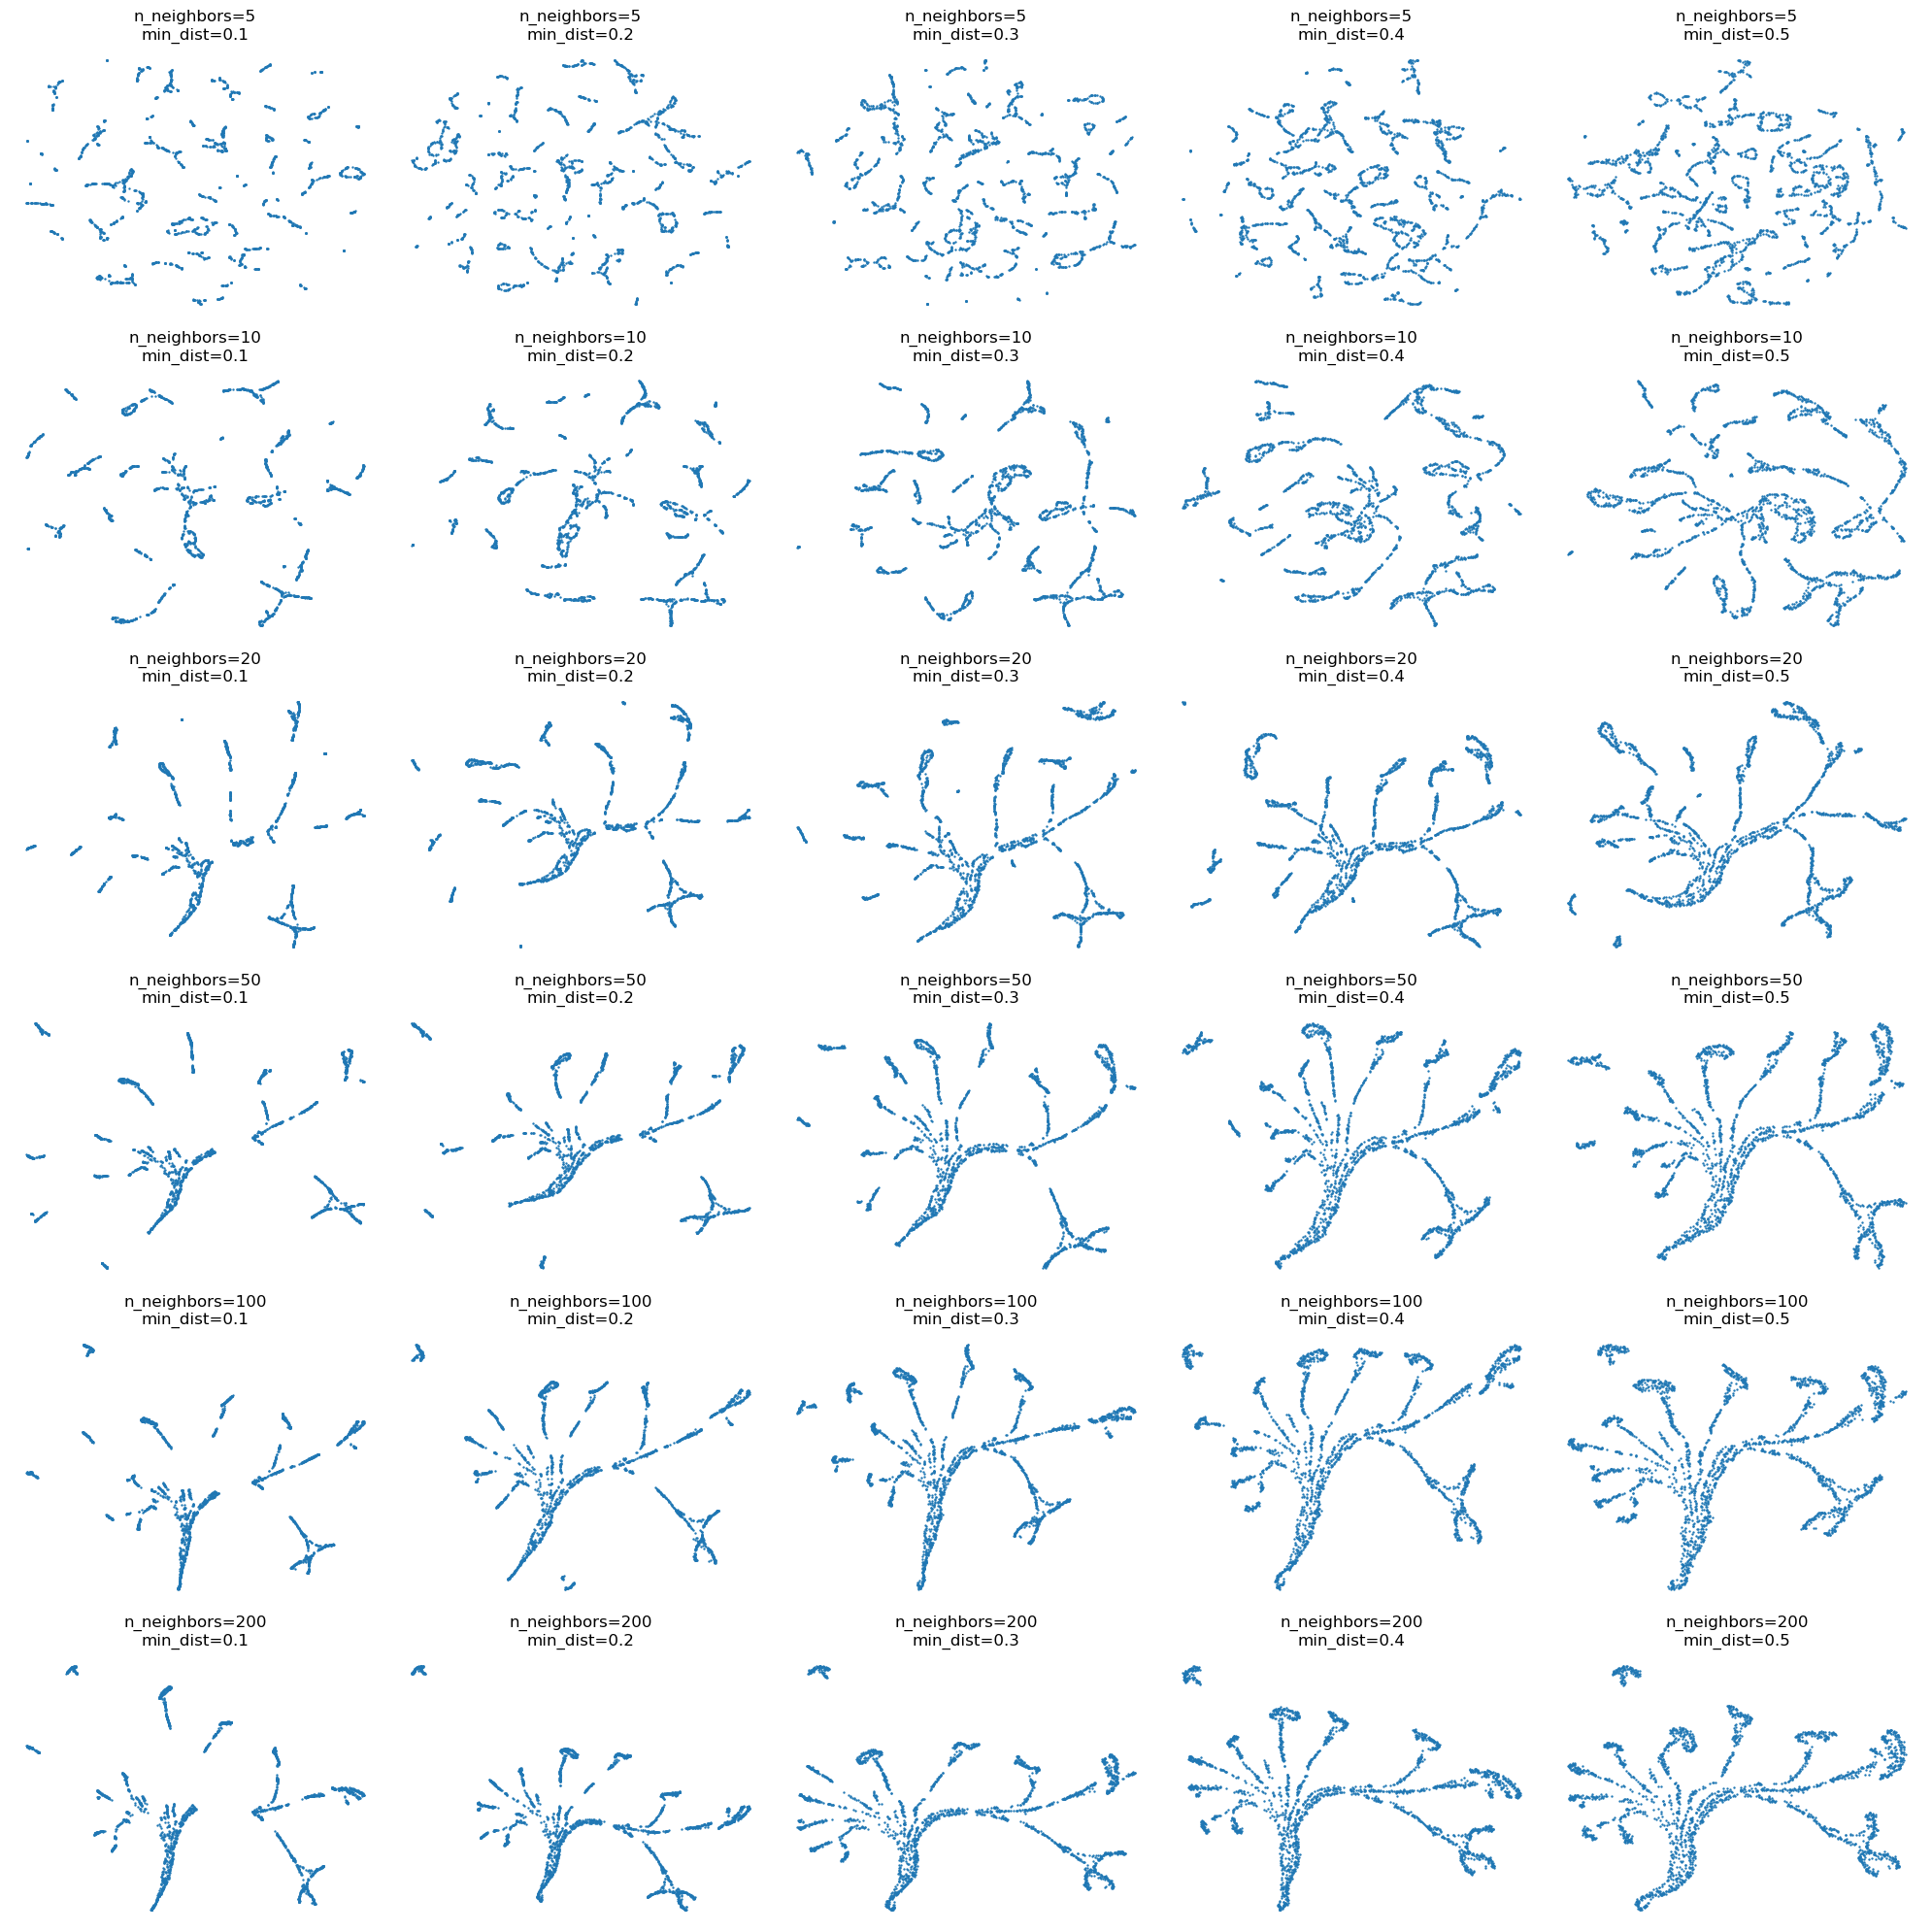

In [38]:
# COM SPENDS

neighbor_ranges = [5, 10, 20, 50, 100, 200]
min_dist_ranges = [0.1, 0.2, 0.3, 0.4, 0.5]

X_sample = info_numeric.sort_index()

# Calculate the number of plots
n_neighbors_len = len(neighbor_ranges)
min_dist_len = len(min_dist_ranges)

# Create a figure with subplots
fig, axs = plt.subplots(n_neighbors_len, min_dist_len, figsize=(20, 20))

# Iterate over the ranges of n_neighbors and min_dist
for i, n_neighbors in enumerate(neighbor_ranges):
    for j, min_dist in enumerate(min_dist_ranges):
        # Create UMAP object with the current n_neighbors and min_dist
        umap_object = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        
        # Fit and transform the data
        umap_embedding = umap_object.fit_transform(X_sample)
        
        # Plot the results
        ax = axs[i, j]
        ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=0.5)
        ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}')
        ax.axis('off')  # Turn off the axis

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


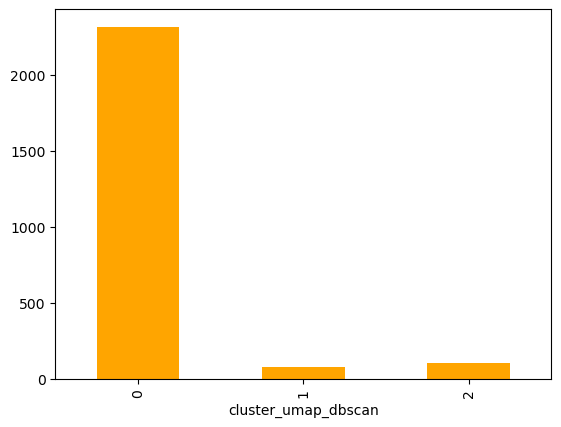

In [29]:
no_quantity_num.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [34]:
no_quantity_num.groupby(['cluster_umap_dbscan']).mean().T

cluster_umap_dbscan,0,1,2
household_key,1279.142,884.737,890.291
retail_disc,-0.560,-0.525,-0.585
coupon_disc,-0.014,-0.007,-0.013
coupon_match_disc,-0.002,-0.001,-0.002
marital_status_code,0.994,0.863,0.961
adult_category_size,1.447,1.562,1.350
has_kids,0.327,0.512,0.456
avg_age,39.267,43.569,51.617
avg_income,74529.132,137000.000,112000.000
n_kids,0.425,0.750,0.612


Number of clusters: 19
Length of dispersion list: 19


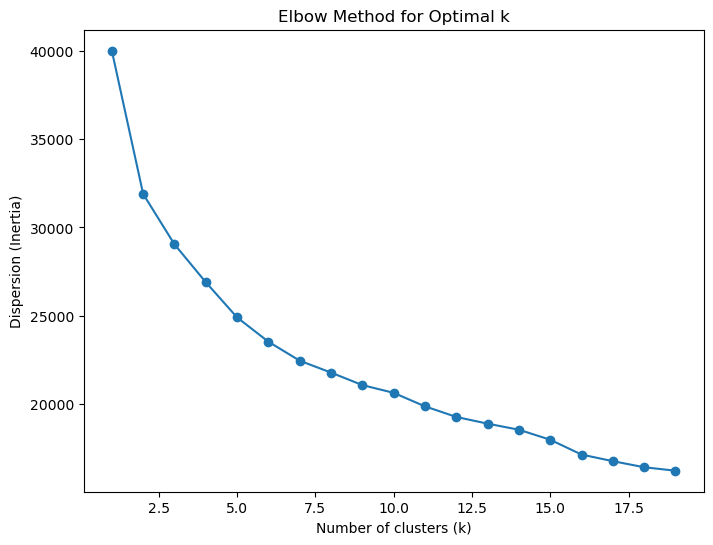

In [36]:
dispersion = []

# Range of cluster numbers
n_clusters_range = range(1, 20)  # From 1 to 19

# Compute dispersion for each number of clusters
for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

# Plot the dispersion (inertia) against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, dispersion, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dispersion (Inertia)')
plt.show()